# Dimensionality Reduction with PCA

In [81]:
# Data manipulation
%matplotlib inline
import time

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [82]:
# Import custom class
%run -i '../src/helper/transfxn.py'
%run -i '../src/helper/imputer.py'

# Load data

In [83]:
df = pd.read_csv('../data/ml_data.csv')
df.head()

,x,y,environment,light,surface_condition,traffic_control,traffic_control_condition,collision_classification,impact_type,no_of_pedestrians,collision_year,collision_month,collision_day,collision_hour
0,357144.87500,5020503.5,Clear,Dark,Dry,Stop sign,NaN,0,Angle,0.0,2013.0,January,Friday,5
1,356860.18750,5013034.5,Freezing rain,Daylight,Ice,Stop sign,NaN,0,Approaching,0.0,2013.0,January,Sunday,5
2,368589.71875,5029516.5,Snow,Daylight,Ice,Stop sign,Functioning,0,Angle,0.0,2013.0,January,Thursday,5
3,370292.90625,5035187.0,Clear,Daylight,Dry,Stop sign,Functioning,0,Angle,0.0,2013.0,January,Saturday,5
4,372133.18750,5032130.5,Clear,Dark,Dry,Stop sign,NaN,0,Rear end,0.0,2013.0,January,Friday,5


# Create feature matrix  and class labels

In [84]:
X, y = df.drop(['collision_classification'], axis = 1), df['collision_classification']

# Transformation pipeline

In [85]:
# Instantiate the  classes
transfxn = TransformationPipeline()
imputer = DataFrameImputer()

## 1. Impute missing values

In [86]:
# Fit transform the training set
X_imputed = imputer.fit_transform(X)

## 2. Preprocessing

In [87]:
# Transform and scale data
X_scaled, _, _ = transfxn.preprocessing(X_imputed, X_imputed)

In [88]:
print('Data size after pre-processing:', X_scaled.shape)

Data size after pre-processing: (104384, 48)


# PCA plot

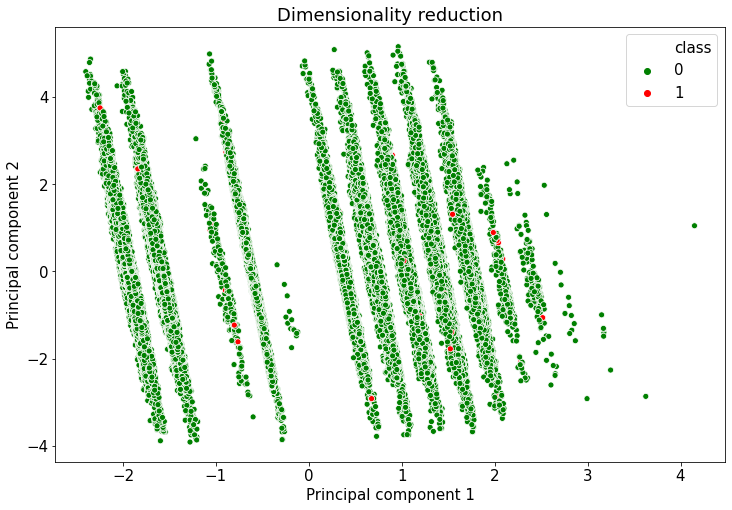

In [89]:
transfxn.pca_plot_labeled(X_scaled, y, palette = ['g', 'r'])